# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 3</span>

## Econofisica

Il mercato finanziario è un sistema complesso Si pensi al prezzo di asset: esso è determinato da un numero elevato di cause non controllabili e non sempre chiaramente individuabili, motivo per cui può essere considerato come un processo stocastico. Per comprendere di che genere di complessità si tratti consigliamo la lettura di *Giocati dal caso* di N. N. Taleb. Nel corso degli anni si è cercato di modellizzare sistemi di questo tipo sfruttando paragoni con sistemi fisici oppure analisi statistiche di *big data*. Di seguito presenteremo la simulazione dell'andamento del prezzo di un tipo preciso di asset finanziario, opzioni europee call e put, secondo la descrizione che ne hanno dato F. Black, M. Scholes e R. Merton (con un triste epilogo).

### Moto browniano geometrico

Cerchiamo di descrivere l'andamento del prezzo di un asset sfruttando la seguente idea: la sua variazione consiste di un termine dovuto a un tasso di interesse e di un termine che descrive fluttuazioni dovute al mercato in cui esso si trova e di cui non conosciamo il diretto rapporto causa effetto. Otteniamo così l'equazione stocastica di un *Random Walk*, dotato di un *drift* che ne determina una crescita (tasso di interesse).
$$dS(t) = \mu S(t)dt + \sigma S(t) dW(t)$$
dove
- $S(t)$ è il prezzo dell'asset al tempo $t$ e $dS(t)$ il suo differenziale,
- $\mu$ è il *drift* e descrive la crescita media del prezzo,
- $\sigma$ è la *volatilità* e misura l'ampiezza delle fluttuazioni,
- $dW(t)$ è il differenziale stocastico.

Questa equazione è stata scritta assumendo che il processo sia *markoviano*, ovvero privo di memoria. Sfruttando le regole di integrazione stocastica (integrale e lemma di Ito), si ricava che 
$$S(t) = S(t') e^{(\mu - \frac{1}{2}\sigma^{2})(t-t') + \sigma(W(t) - W(t'))}$$
con $t'< t$

Le approssimazioni fatte per descrivere l'andamento del prezzo di asset tramite moto browniano geometrico sono molto forti e poco realistiche. Infatti abbiamo assunto $\mu$ e $\sigma$ costanti nel tempo, cosa non vera in particolar modo per $\sigma$. Inoltre, nella realtà, sistemi di questo tipo spesso presentano memoria più o meno lunga rendendo il processo non markoviano.

### Opzioni europee

In finanza, un'*opzione* è un contratto tra due parti dove una compra il diritto di comprare/vendere all'altra un certo asset a un prezzo fissato (*strike price*), dopo un certo tempo (*delivery time*). Nello specifico abbiamo *opzioni call* e *opzioni put*.
- **Call:** A ha il diritto di comprare da B l'asset al tempo $t = T$ al prezzo fissato nel momento in cui viene stipulato il contratto, $t=0$,
- **Put:** A ha il diritto di vendere a B l'asset al tempo $t = T$ al prezzo fissato nel momento in cui viene stipulato il contratto, $t=0$.

Il motivo per cui vengon stipulati questi tipi di contratti è avere delle garanzie: A vuole avere la garanzia di comprare l'asset al tempo $T$ ed è disposto a pagare un certo prezzo. Se al tempo $T$ ci fossero altri investitori disposti a pagare di più (ovvero è salito il prezzo dell'asset), A non riuscirebbe ad ottenere il suo scopo. D'altra parte A è disposto a correre il rischio che il prezzo dell'asset scenda nel tempo, ritrovandosi ad aver pagato di più un bene che poteva pagare di meno. Il caso contrario è quello dell'opzione *put*, dove il diritto è a vendere invece che comprare.

### Black-Scholes Theory
Balck e Scholes hanno costruito una teoria per valutare i prezzi di opzioni *call* e *put*, ipotizzando che il prezzo dell'asset si comporti come un **moto browniano geometrico**, a *rate di interesse* $r$ e *volatilità* $\sigma$ fissati. In questo modo hanno ottenuto le seguenti equazioni per il prezzo di tali opzioni:
- Opzioni Call Europee:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Opzioni Put Europee:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

con 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

con $d_2 = d_1 - \sigma\sqrt{T-t}$, e con
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
ovvero la funzione cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,

mentre
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

### Esercizio 03.1

Di seguito calcoliamo i prezzi di ***Put*** e ***Call*** a $t=0$, fissando i seguenti parametri:
- prezzo dell'asset a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

Il prezzo a cui acquistare tali opzioni deve essere conveniente pertanto (se compro un asset a un prezzo molto più alto di quanto potevo pagarlo andrò in perdita):
- $C[S(0),0] = e^{-rT}max[0,(S(T)-K)]$
- $P[S(0),0] = e^{-rT}max[0,(K - S(T))]$

Le simulazioni avvengono con due approcci differenti:
1. Campionando direttamente $S(T)$ a partire da un moto browniano geometrico,
2. Simulando l'andamento di $S(T)$ facendo passi $t_{i}$ fino a $t_{100} = T$ e utilizzando poi il valore ottenuto di $S(T)$ per il calcolo richiesto.

#### Campionamento diretto
Riscriviamo $S(T)$ nel seguente modo:
$$S(T) = S(0) \exp{[(r - \frac{1}{2}\sigma^{2})T + \sigma z \sqrt{T}]}$$
dove $z$ è una variabile stocastica distribuita in maniera gaussiana con valor medio nullo e varianza unitaria. Insieme con $\sqrt{T}$ sostituisce la quantità $W(T)-W(0)$ che deve essere distribuita in maniera gaussiana con varianza $T$ per il teorema del limite centrale.

#### Campionamento discreto
In questo caso simuliamo l'evoluzione di $S(T)$ tramite un moto browniano geometrico di $100$ passi, dove, di volta in volta, valutiamo:
$$S(t_{i+1}) = S(t_{i}) \exp{[(r - \frac{1}{2}\sigma^{2})(t_{i+1}-t_{i}) + \sigma z \sqrt{t_{i+1}-t_{i}}]}$$
con $z$ ancora estratta da una distribuzione gaussiana con valor medio nullo e varianza unitaria.

### Black-Scholes soluzione analitica:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

%config InlineBackend.figure_format='retina'

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call_BS, put_BS = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call_BS)
    print("put: ", put_BS)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Campionamento diretto - risultati

Di seguito riportiamo la media progressima del prezzo di *Call* e *Put* a $t=0$, all'aumentare del numero di blocchi. La simulazione ha prodotto $10^{5}$ dati suddivisi in $200$ blocchi.

Text(0.5, 1.0, 'Put options')

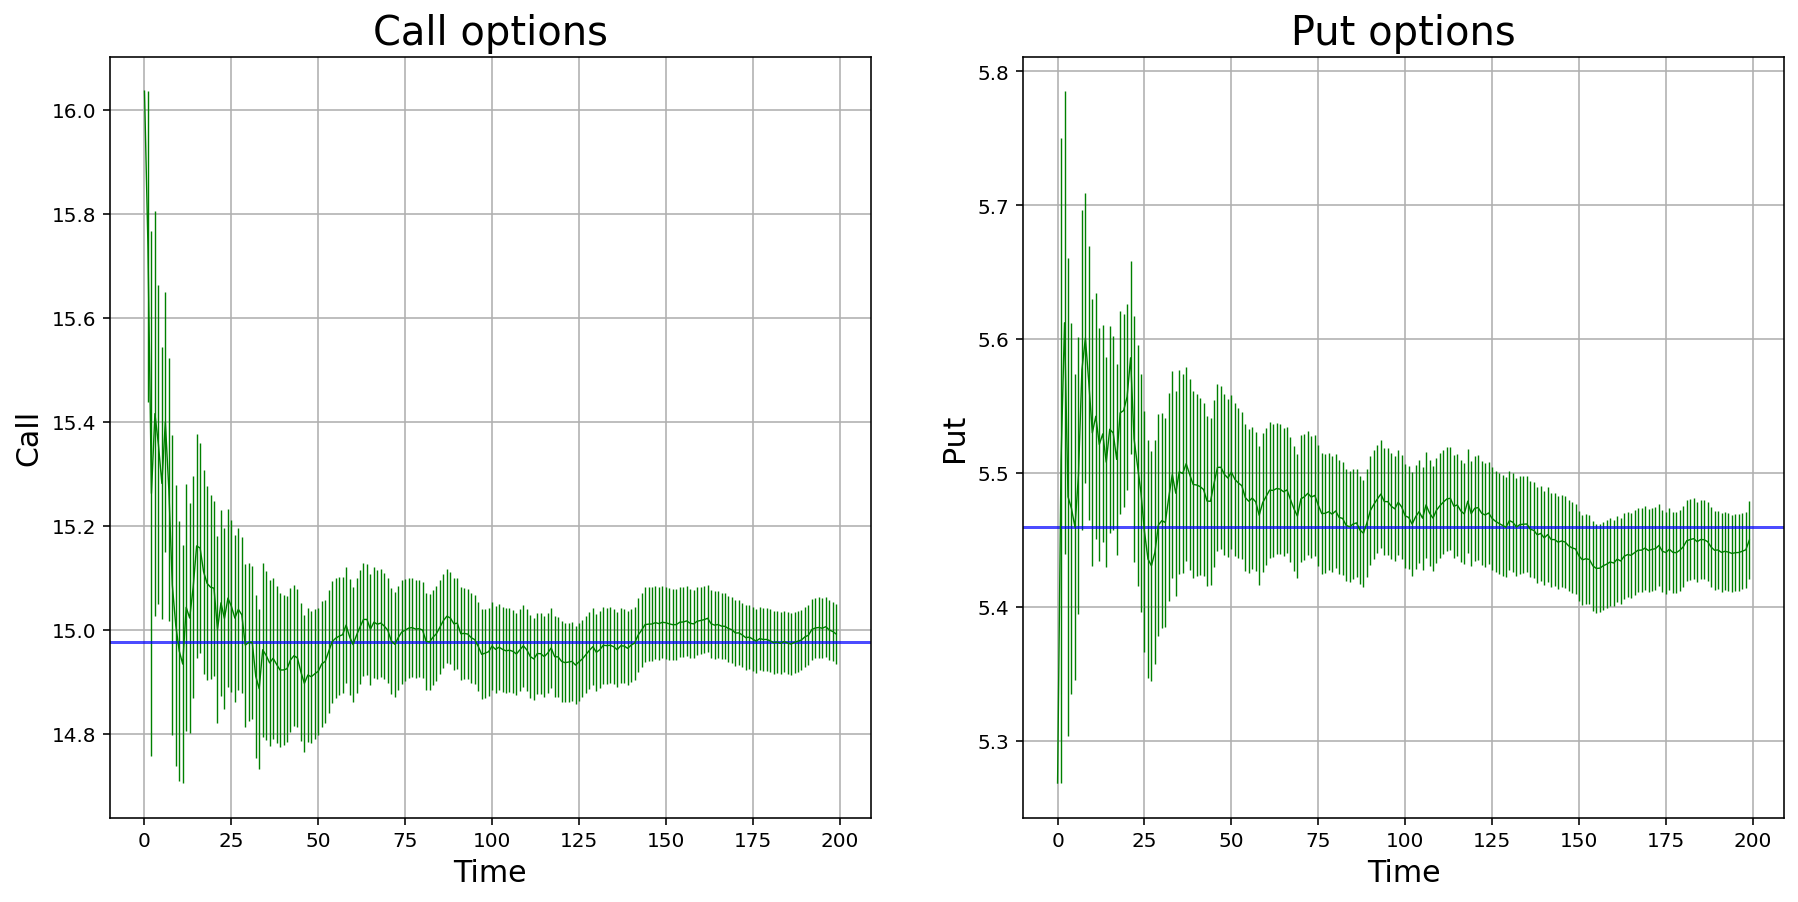

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

x = np.arange(0,200,1)
call = pd.read_csv("Esercizio 3/data/call.csv", header=None)
put = pd.read_csv("Esercizio 3/data/put.csv", header=None)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].grid()
ax[0].errorbar(x, call[0], yerr=call[1], color='g', linewidth=0.7)
ax[0].axhline(call_BS, color='b', alpha=0.7)
ax[0].set_ylabel('Call', size=15)
ax[0].set_xlabel('Time', size=15)
ax[0].set_title('Call options', size=20)
ax[1].grid()
ax[1].errorbar(x, put[0], yerr=put[1], color='g', linewidth=0.7)
ax[1].axhline(put_BS, color='b', alpha=0.7)
ax[1].set_ylabel('Put', size=15)
ax[1].set_xlabel('Time', size=15)
ax[1].set_title('Put options', size=20)

Dai grafici su riportati è possibile osservare come, tramite campionamento diretto, i valori dei prezzi si assestino attorno al valore predetto dalle equazioni di Black e Scholes. L'errore stimato tramite data blocking rende compatibile i risultati della simulazione con i valori attesi.

### Campionamento discreto - risultati

Sono stati prodotti $10^{5}$ dati suddivisi in $200$ blocchi. Per ogni punto è stato simulata l'evoluzione di $S(t)$ per poi estrarre il valore al tempo $T$.

Text(0.5, 1.0, 'Put options')

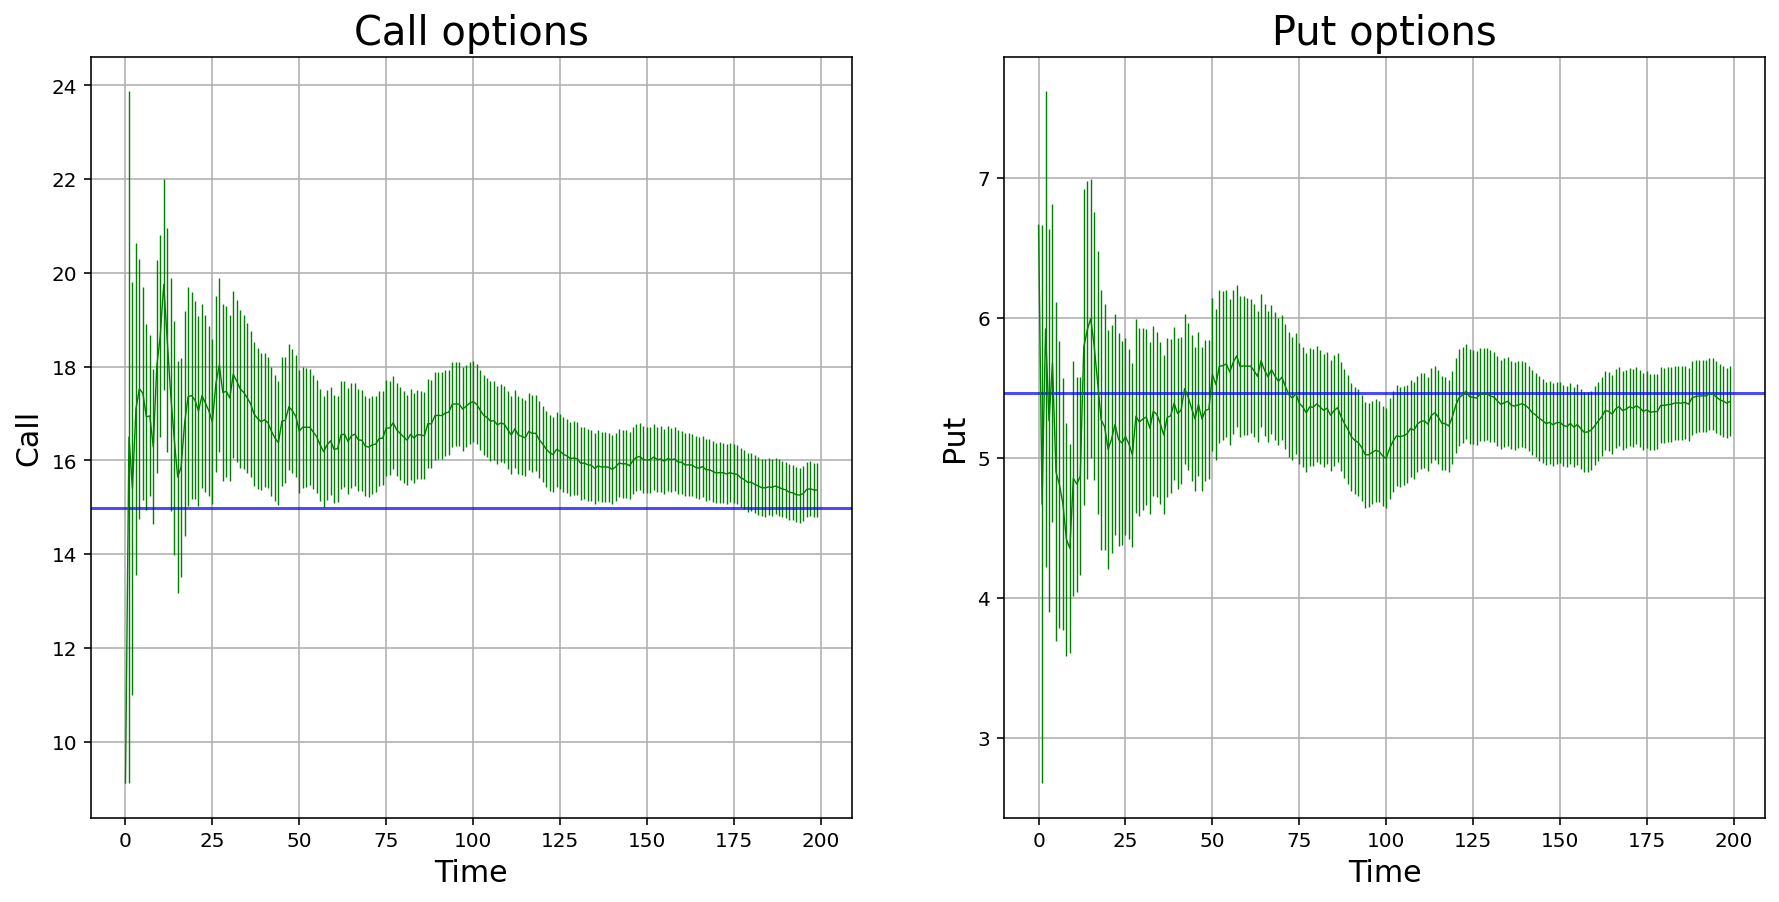

In [3]:
call = pd.read_csv("Esercizio 3/data/C_simulation.csv", header=None)
put = pd.read_csv("Esercizio 3/data/P_simulation.csv", header=None)
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].grid()
ax[0].errorbar(x, call[0], yerr=call[1], color='g', linewidth=0.7)
ax[0].axhline(call_BS, color='b', alpha=0.7)
ax[0].set_ylabel('Call', size=15)
ax[0].set_xlabel('Time', size=15)
ax[0].set_title('Call options', size=20)
ax[1].grid()
ax[1].errorbar(x, put[0], yerr=put[1], color='g', linewidth=0.7)
ax[1].axhline(put_BS, color='b', alpha=0.7)
ax[1].set_ylabel('Put', size=15)
ax[1].set_xlabel('Time', size=15)
ax[1].set_title('Put options', size=20)

Osserviamo che i risultati convergono più lentamente al valore atteso rispetto al caso precedente. Anche in questo caso la simulazione è compatibile con il valore atteso. Infine riportiamo, a titolo di esempio, uno degli $S(T)$ simulati

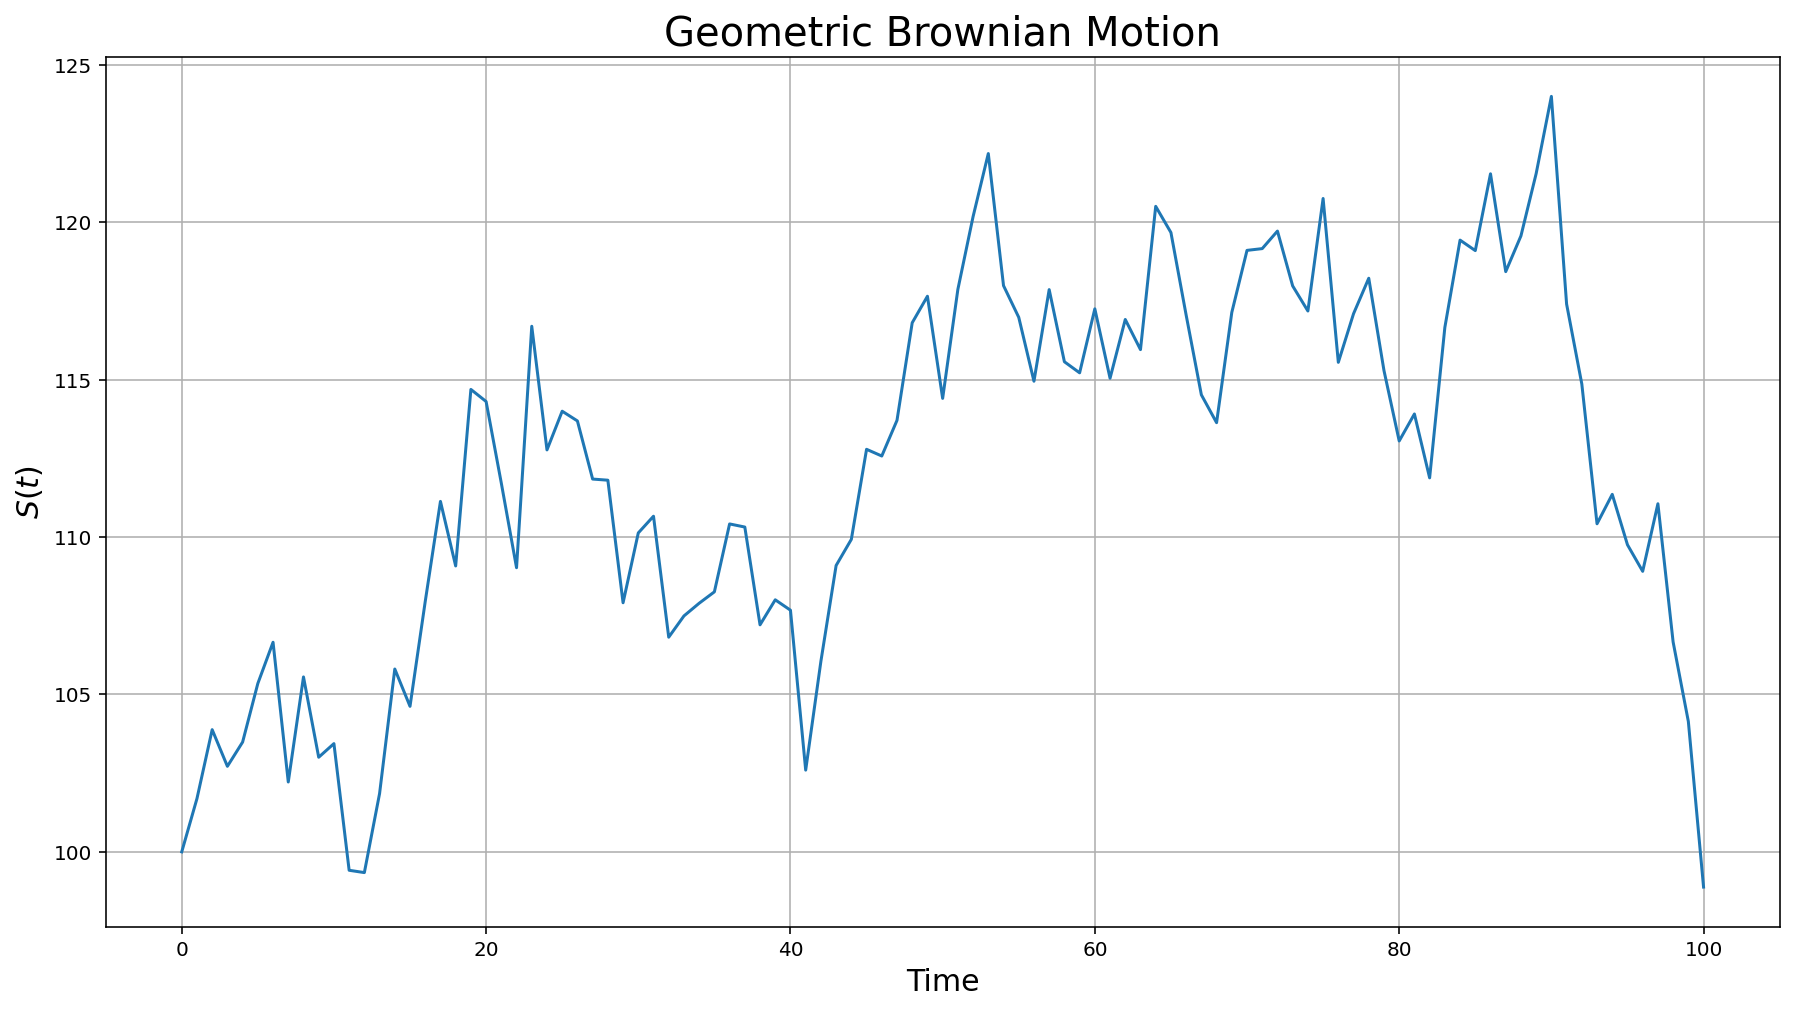

In [4]:
gmb = pd.read_csv("Esercizio 3/Data/gbm.csv", header = None)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(gmb[0])
ax.set_xlabel('Time', size=15)
ax.set_ylabel('$S(t)$', size=15)
ax.set_title('Geometric Brownian Motion', size=20)
ax.grid()